<a href="https://colab.research.google.com/github/hcgalvantech/proyecto_integrado_2_/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Lista de apellidos y nombres (puedes agregar más)
apellidos = ["Gómez", "Rodríguez", "López", "Fernández", "García", "Martínez", "Pérez", "González", "Sánchez", "Romero"]
nombres = ["Juan", "María", "Carlos", "Laura", "Diego", "Ana", "Pedro", "Sofía", "Miguel", "Valentina"]


def generar_datos(num_filas):
    data = []
    for _ in range(num_filas):
        apellido = random.choice(apellidos)
        nombre = random.choice(nombres)
        dni = random.randint(10000000, 99999999)  # Número de DNI aleatorio
        materia = random.choice(materias)
        nota1 = random.randint(1, 10)
        nota2 = random.randint(1, 10)
        nota3 = random.randint(1, 10)
        faltas = random.randint(0, 15)
        data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])
    return data

# Generar datos para 100 filas
datos = generar_datos(100)

# Crear el DataFrame
df = pd.DataFrame(datos, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Imprimir el DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Martínez,Laura,97318936,Educación Física,6,3,5,4
1,López,Diego,33425150,Ciencias Naturales,3,8,2,11
2,Sánchez,Miguel,87776104,Inglés,2,6,10,10
3,Fernández,Juan,16622304,Educación Física,4,3,4,11
4,Gómez,Laura,43647350,Música,4,8,3,8
...,...,...,...,...,...,...,...,...
95,Gómez,Pedro,39092119,Filosofía,8,6,10,12
96,Gómez,María,25145998,Filosofía,3,2,5,9
97,Sánchez,María,13249442,Arte,3,6,5,2
98,Fernández,Juan,97489545,Matemática,6,3,8,4


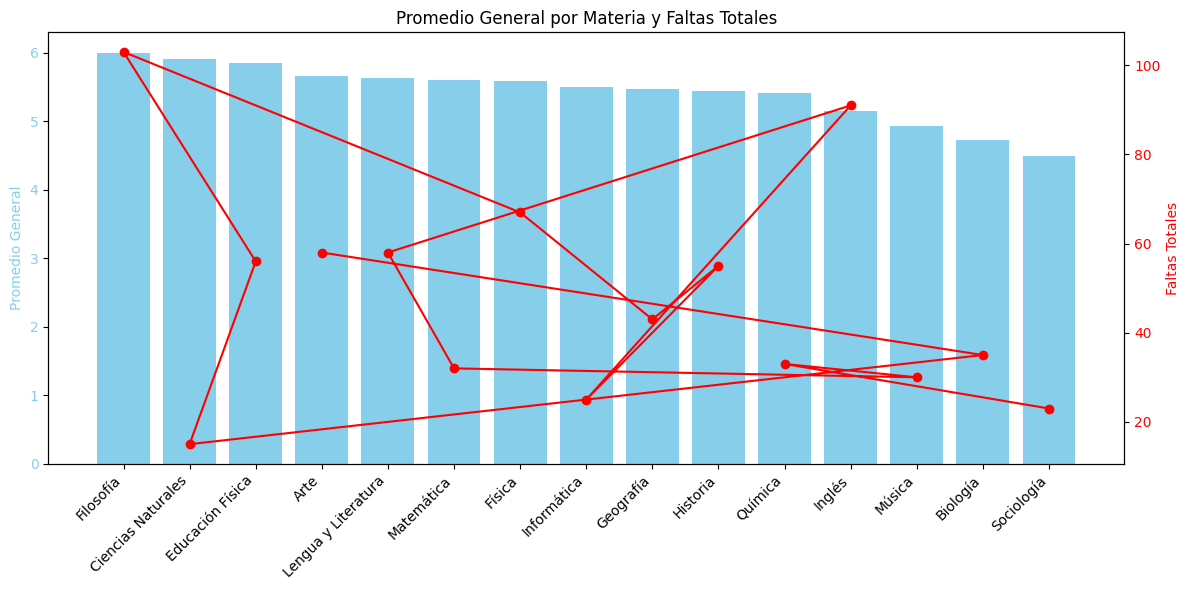

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedio_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar de mayor a menor promedio
promedio_materias = promedio_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_materias = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para el promedio de las materias
ax1.bar(promedio_materias.index, promedio_materias.values, color='skyblue')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia y Faltas Totales')
plt.xticks(rotation=45, ha='right')

# Eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Ajustar el espaciado entre las barras
fig.tight_layout()

# Mostrar el gráfico
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)